# Coding Temple's Data Analytics Program
---
## Intro to API's Assignment
---
### Problem 1:
Check out this Pokemon API https://pokeapi.co/
Use the requests package to connect to this API and get and store data for 5 different pokemon.
Get the pokemons: name, atleast one ability's name, base_experience, and the URL for its sprite (an image that shows up on screen) for the 'front_shiny', attack base_state, hp base_stat, defense base_stat

**BONUS POINTS IF YOU CAN POPULATE THE IMAGE!**

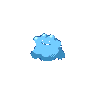

name : ditto
ability 1 : limber
base_experience : 101
front_shiny_png : https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/132.png
attack_stat_base : 48
hp_stat_base : 48
defense_stat_base : 48


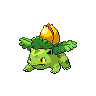

name : ivysaur
ability 1 : overgrow
base_experience : 142
front_shiny_png : https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/2.png
attack_stat_base : 62
hp_stat_base : 60
defense_stat_base : 63


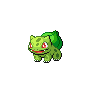

name : bulbasaur
ability 1 : overgrow
base_experience : 64
front_shiny_png : https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/1.png
attack_stat_base : 49
hp_stat_base : 45
defense_stat_base : 49


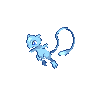

name : mew
ability 1 : synchronize
base_experience : 300
front_shiny_png : https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/151.png
attack_stat_base : 100
hp_stat_base : 100
defense_stat_base : 100


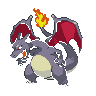

name : charizard
ability 1 : blaze
base_experience : 267
front_shiny_png : https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/6.png
attack_stat_base : 84
hp_stat_base : 78
defense_stat_base : 78


In [30]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO



# fairly straightforward here just grabbing some pokemon and stats
def catchpoke(name):
    url = f'https://pokeapi.co/api/v2/pokemon/{name}'
    response= requests.get(url)
    my_data = response
    my_data.json()
    poke_dict = {
        'name' : name,
        'ability 1' : my_data.json()['abilities'][0]['ability']['name'],
        'base_experience' : my_data.json()['base_experience'],
        'front_shiny_png' : my_data.json()['sprites']['front_shiny'],
        'attack_stat_base' : my_data.json()['stats'][1]['base_stat'], 
        'hp_stat_base' : my_data.json()['stats'][0]['base_stat'],
        'defense_stat_base' : my_data.json()['stats'][2]['base_stat']}    
    
    #block for image
    img_str = my_data.json()['sprites']['front_shiny']
    response = requests.get(img_str)
    img= Image.open(BytesIO(response.content))
    img =img.convert('RGB')
    output_image_path = 'output_image.jpg'
    img.save(output_image_path)
    #display image
    display(img)

    #return dictionary
    return '\n'.join(f'{keys} : {val}' for keys,val in poke_dict.items())




print(catchpoke('ditto'))
print(catchpoke('ivysaur'))
print(catchpoke('bulbasaur'))
print(catchpoke('mew'))
print(catchpoke('charizard'))



### Problem 2:

I want to build the best Pokemon team I can and I need your help to do so! Using the API, build me a team of 6 pokemon who's base-stats are above 60. Return any additional information you think is needed to help understand why you chose that pokemon for the team!

In [2]:
#url ='https://pokeapi.co/api/v2/pokemon/'
url= 'https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0' 
response = requests.get(url)
#build a pokesort data frame
pokesort = response
   
#create a dictionary to load our dataframe into
highstats={}


def pokeStats(name):
    url = f'https://pokeapi.co/api/v2/pokemon/{name}'
    response= requests.get(url)
    my_data = response
    my_data.json()['stats']


    #reset poke stats/init poke stats
    pokestats=[]

    #check if any stat is less than 60 
    for stat in my_data.json()['stats']:
        if stat['base_stat'] < 60: 
            return None
        else:
            pokestats.append(stat['base_stat'])
    
    #add the >60 stats to dictionary
    highstats[name] = pokestats

    
    return

#pass name of all pokemon through our pokestats function
for poke in pokesort.json()['results']:
    pokeStats(poke['name'])


#build a dataframe from the dictionary we built, I really wanted to add this to practice for something I want to do in the future.
df_poke = pd.DataFrame.from_dict(highstats,columns=['hp','atk','def','spec_atk','spec_def','speed'],orient='index')
#I decided to give speed less stat weight because tbh i feel like damage and defense is a bit more important but I also know 0 about pokemon tbh        
df_poke['statscore'] = df_poke['hp'] + df_poke['atk'] + df_poke['def'] + df_poke['spec_atk'] + df_poke['spec_def'] + df_poke['speed']/2

#I decided to show the top 6 of the stat density based on all pokemon (i think idk if the site is limiting me or not)
display(df_poke.sort_values('statscore',ascending=False).head(6))


#this took about 3 minutes to work, but I can no longer lose based on these stats. I think.
#Idk pokemon too well.









,hp,atk,def,spec_atk,spec_def,speed,statscore
eternatus-eternamax,255,115,250,125,250,130,1060.0
kyogre-primal,100,150,90,180,160,90,725.0
groudon-primal,100,180,160,150,90,90,725.0
rayquaza-mega,105,180,100,180,100,115,722.5
mewtwo-mega-x,106,190,100,154,100,130,715.0
mewtwo-mega-y,106,150,70,194,120,140,710.0


### Problem 3:

Create a function that does the following:
* Input: pokemon_name(user_defined) -> str
* Output: list object containing a dictionary of values from the response object.
* Please include the type, the most current raritey level, at least one held item, and all stats

In [165]:


def pokeRequest():
    name = input("please enter a pokemon name: ")
    url = f'https://pokeapi.co/api/v2/pokemon/{name}'
    response= requests.get(url)
    my_data = response
    my_data.json()
 
    poke_dict = {
            'name' : name,
        }
        #adding types

    poke_dict["Types"]= [type['type']['name'] for type in  my_data.json()['types']]
            
    #add all stats to dict
    for stats in my_data.json()['stats']:
            poke_dict[stats['stat']['name']]=stats['base_stat']
        #I had to add this block because some pokemon do not have items
    if not response.json():
            poke_dict["ITEMS"]=None
    else:
            poke_dict["ITEMS"]= [item['item']['name'] for item in  my_data.json()['held_items']]
        
  
    #wow, this took a long time. Look to the end of the version list, grab the rarity, for some reason this doesnt work on itemless pokemon?
    #or is rarity a thing with the items of the pokemon. I am not too familiar as I never really played.
    #i assume its items since they always seem to match in count, i think playing or knowing
    #more pokemon would have made this much easier. Because this could be pokemon rarity and
    #I would have 0 idea .
    poke_dict["Item_rarity"]=[item['version_details'][::-1][0]['rarity'] for item in  my_data.json()['held_items']]  

    return poke_dict



display(pokeRequest())






{'name': 'ditto',
 'Types': ['normal'],
 'hp': 48,
 'attack': 48,
 'defense': 48,
 'special-attack': 48,
 'special-defense': 48,
 'speed': 48,
 'ITEMS': ['metal-powder', 'quick-powder'],
 'Item_rarity': [5, 50]}